# **Atividade Avaliativa: Análise Exploratória do Titanic Dataset**

 - **Disciplina:** Aprendizado de Máquina
 - **Professor:** Fabricio Bizotto
 - **Duração:** 2 horas
 - **Valor:** 10 pontos

## **Objetivo**
Nesta atividade, você aplicará técnicas de análise exploratória de dados no **Titanic Dataset**, utilizando Python e bibliotecas como `pandas`, `numpy`, `matplotlib` e `seaborn`. O objetivo é explorar os dados, interpretar distribuições, identificar padrões e responder perguntas baseadas em análises estatísticas e visuais.

## **📂 Instruções**
- Use o ambiente Google Colab ou um editor Python local.
- Carregue o dataset diretamente do `seaborn` com `sns.load_dataset("titanic")`.
- Responda às perguntas no formato indicado (código ou texto).
- Envie o arquivo `.ipynb` ou link do colab com os resultados ao final.

## **Dicionário de Dados**
| Coluna       | Descrição                                              | Tipo de Dado |
|--------------|-------------------------------------------------------|--------------|
| `survived`   | Sobreviveu (1 = Sim, 0 = Não)                        | Numérico (int) |
| `pclass`     | Classe do bilhete (1, 2, 3)                          | Numérico (int) |
| `sex`        | Sexo (male, female)                                  | Categórico (string) |
| `age`        | Idade                                                | Numérico (float) |
| `sibsp`      | Nº de irmãos/cônjuges a bordo                        | Numérico (int) |
| `parch`      | Nº de pais/filhos a bordo                            | Numérico (int) |
| `fare`       | Tarifa do bilhete                                    | Numérico (float) |
| `embarked`   | Porto de embarque (C, Q, S)                          | Categórico (string) |

---

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Parte 1: Exploração Inicial (2,0 pontos)**

1. **(0,5 ponto)** Carregue o dataset e exiba as 5 primeiras linhas. Quantas amostras e atributos ele possui?
2. **(0,5 ponto)** Liste os tipos de dados de cada coluna. Quantas colunas são numéricas e quantas são categóricas?
3. **(1,0 ponto)** Verifique os valores ausentes. Qual coluna tem mais valores ausentes? Proponha uma estratégia simples para lidar com isso.

---

In [14]:
df = sns.load_dataset("titanic")
print(df.head())

print("\nNúmero de amostras:", df.shape[0])
print("Número de atributos:", df.shape[1])

print("\nTipos de dados de cada coluna:")
print(df.dtypes)

print("\nNúmero de colunas numéricas:", df.select_dtypes(include=[np.number]).shape[1])
print("\nNúmero de colunas categóricas:", df.select_dtypes(exclude=[np.number]).shape[1])

print("\nValores ausentes por coluna:")
print(df.isnull().sum())
print("\nColuna com mais valores ausentes:", df.isnull().sum().idxmax())
print("\nEstratégia: preencher valores ausentes com a média para colunas numéricas e com a moda para colunas categóricas")
df['age'] = df['age'].fillna(df['age'].mean())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Número de amostras: 891
Número de atributos: 15

Tipos de dados de cada coluna:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             

## **Parte 2: Estatísticas Descritivas (2,0 pontos)**

4. **(1,0 ponto)** Gere estatísticas descritivas das colunas numéricas. Qual é a média e o valor máximo da tarifa (`fare`)? Há indícios de outliers nessa coluna? Justifique.
5. **(1,0 ponto)** Conte os valores únicos da coluna `sex`. Qual a proporção de homens e mulheres no dataset?

---

Estatísticas descritivas das colunas numéricas:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.002015    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   29.699118    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Média da tarifa (fare): 32.204207968574636
Valor máximo da tarifa (fare): 512.3292

Limite superior para outliers na coluna 'fare' (Q3 + 1.5 * IQR): 65.63
Número de possíveis outliers na coluna 'fare': 116
Porcentagem de outliers: 13.02%

Sim, há in

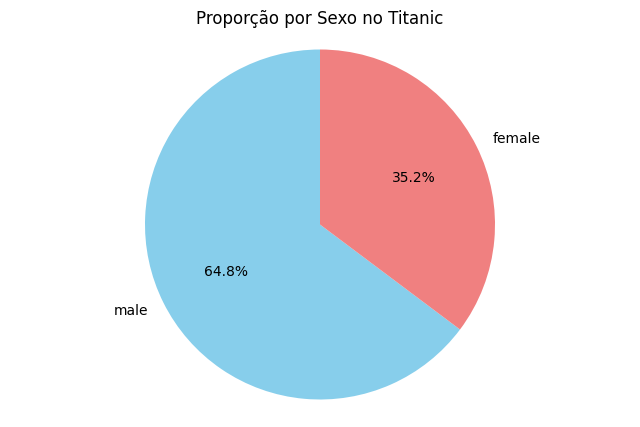

In [15]:
print("Estatísticas descritivas das colunas numéricas:")
print(df.describe())

print("\nMédia da tarifa (fare):", df['fare'].mean())
print("Valor máximo da tarifa (fare):", df['fare'].max())

Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
outliers_fare = df[df['fare'] > upper]

print(f"\nLimite superior para outliers na coluna 'fare' (Q3 + 1.5 * IQR): {upper:.2f}")
print(f"Número de possíveis outliers na coluna 'fare': {len(outliers_fare)}")
print(f"Porcentagem de outliers: {(len(outliers_fare) / len(df) * 100):.2f}%")
print("\nSim, há indícios de outliers na coluna 'fare', pois existem valores que excedem significativamente o limite superior calculado pelo método IQR.")

print("\nValores únicos da coluna 'sex':")
print(df['sex'].value_counts())

sex_counts = df['sex'].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.axis('equal')
plt.title('Proporção por Sexo no Titanic')
plt.show()

## **Parte 3: Visualização de Dados (3,0 pontos)**

6. **(1,0 ponto)** Crie um histograma da coluna `age`. A distribuição é simétrica ou assimétrica? Justifique.
7. **(1,0 ponto)** Plote um boxplot da coluna `fare`. Quantos outliers aproximados você observa acima do limite superior?
8. **(1,0 ponto)** Gere um gráfico de barras mostrando a proporção de sobreviventes por sexo (`sex`). Qual sexo teve maior taxa de sobrevivência?

---

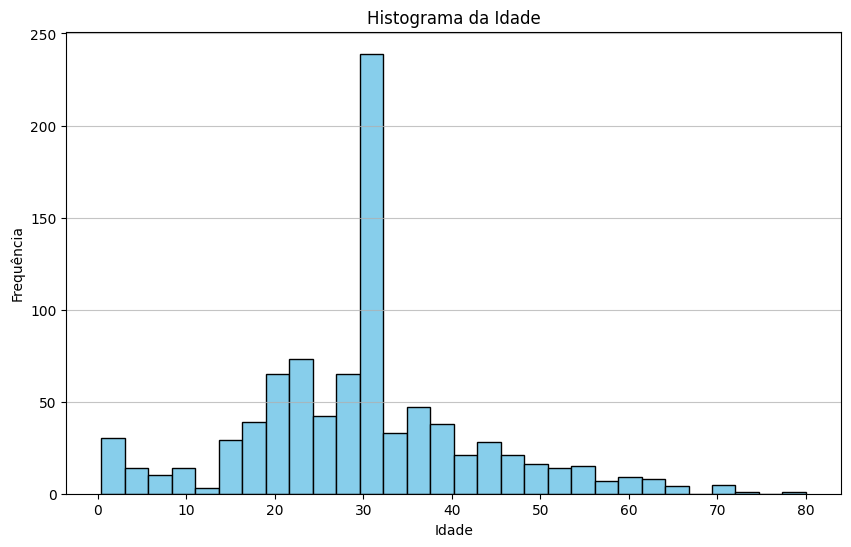


A distribuição da idade parece ser assimétrica, devido a uma grande concentração de passageiros com idade entre 22 e 35 anos, com poucos passageiros muito jovens ou muito velhos. Isso pode ser observado pelo histograma, onde a maioria dos passageiros está concentrada em torno da média de idade de 29 anos.


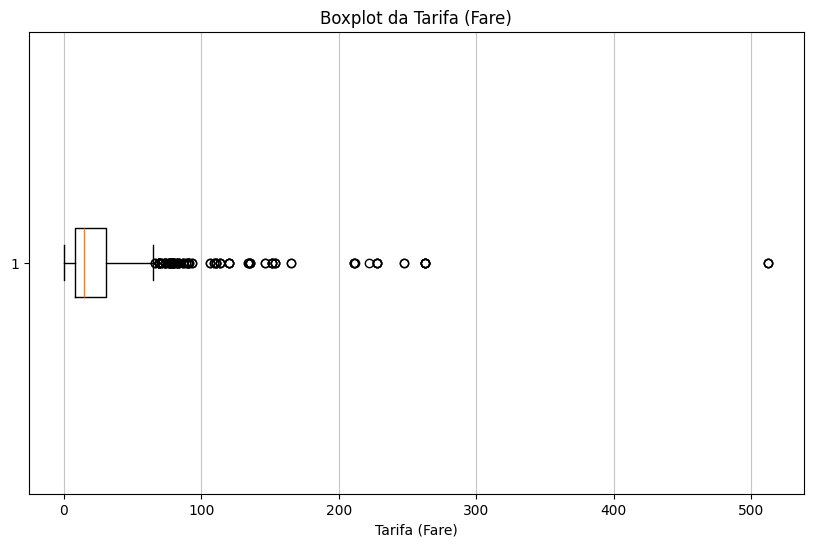


116 outliers acima do limite superior foram observados no boxplot da tarifa (fare).


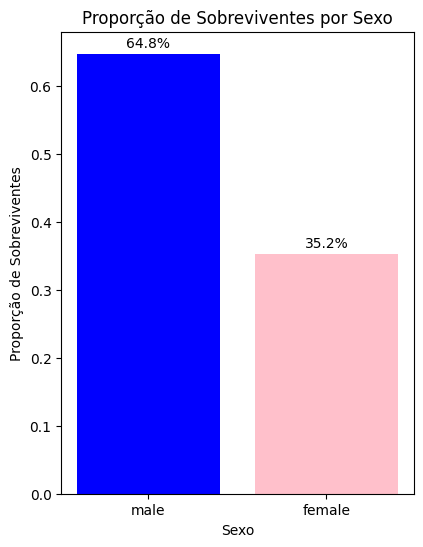

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

# print(df['age'].describe())

print("\nA distribuição da idade parece ser assimétrica, devido a uma grande concentração de passageiros com idade entre 22 e 35 anos, com poucos passageiros muito jovens ou muito velhos. Isso pode ser observado pelo histograma, onde a maioria dos passageiros está concentrada em torno da média de idade de 29 anos.")

plt.figure(figsize=(10, 6))
plt.boxplot(df['fare'], vert=False)
plt.title('Boxplot da Tarifa (Fare)')
plt.xlabel('Tarifa (Fare)')
plt.grid(axis='x', alpha=0.75)
plt.show()

print(f"\n{len(outliers_fare)} outliers acima do limite superior foram observados no boxplot da tarifa (fare).\n")

sex_counts = df['sex'].value_counts()
total = len(df)
sex_proportion = sex_counts.values / total
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Proporção de Sobreviventes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Proporção de Sobreviventes')
plt.bar(sex_counts.index, sex_proportion, color=['blue', 'pink'])
for i, v in enumerate(sex_proportion):
    plt.text(i, v + 0.01, f"{v:.1%}", ha='center')
plt.show()

## **Parte 4: Tratamento de Outliers (2,0 pontos)**

O IQR é um método poderoso para identificar outliers. O método IQR (Intervalo entre Quartis) para detecção de outliers foi desenvolvido por John Tukey, o pioneiro na análise exploratória de dados.

9. **(1,0 ponto)** Use o método IQR para identificar outliers na coluna `age`. Quantas amostras permanecem após a remoção?
10. **(1,0 ponto)** Plote um boxplot de `age` antes e depois da remoção de outliers. Qual é o impacto visual dessa remoção?

**Código Base:**
```python
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]
```

---


Limite inferior para outliers na coluna 'age': 2.50
Limite superior para outliers na coluna 'age': 54.50
Número de possíveis outliers na coluna 'age': 66
Número de amostras antes da remoção de outliers na coluna 'age': 891
Número de amostras após a remoção de outliers na coluna 'age': 825


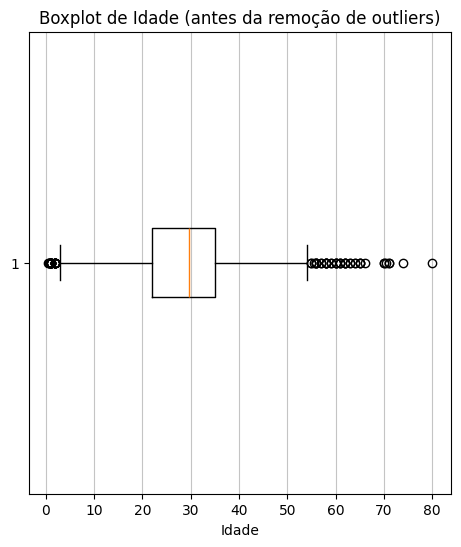

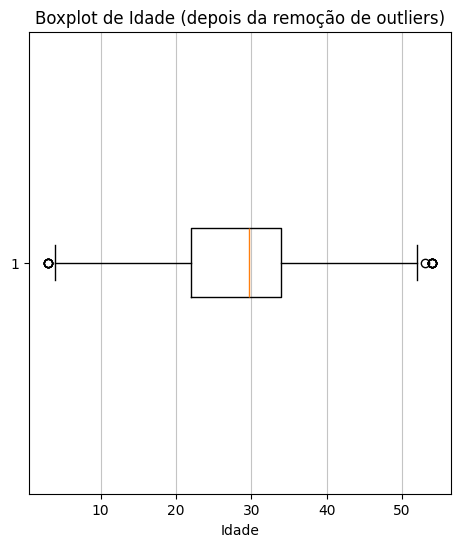


O impacto visual é bem significativo, pois são removidos 66 valores que não estão dentro dos limites superior e inferior do boxplot.


In [22]:
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower = Q1_age - 1.5 * IQR_age
upper = Q3_age + 1.5 * IQR_age
outliers_age = df[(df['age'] < lower) | (df['age'] > upper)]
print(f"\nLimite inferior para outliers na coluna 'age': {lower:.2f}")
print(f"Limite superior para outliers na coluna 'age': {upper:.2f}")
print(f"Número de possíveis outliers na coluna 'age': {len(outliers_age)}")
df_sem_outliers_age = df[~df.index.isin(outliers_age.index)]
print(f"Número de amostras antes da remoção de outliers na coluna 'age': {len(df)}")
print(f"Número de amostras após a remoção de outliers na coluna 'age': {len(df_sem_outliers_age)}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['age'], vert=False)
plt.title('Boxplot de Idade (antes da remoção de outliers)')
plt.xlabel('Idade')
plt.grid(axis='x', alpha=0.75)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.boxplot(df_sem_outliers_age['age'], vert=False)
plt.title('Boxplot de Idade (depois da remoção de outliers)')
plt.xlabel('Idade')
plt.grid(axis='x', alpha=0.75)
plt.show()

print(f"\nO impacto visual é bem significativo, pois são removidos {len(df) - len(df_sem_outliers_age)} valores que não estão dentro dos limites superior e inferior do boxplot.")

## **Parte 5: Correlação e Conclusão (1,0 ponto)**

11. **(1,0 ponto)** Crie um mapa de calor das correlações entre as colunas numéricas. Qual atributo tem a maior correlação (positiva ou negativa) com `survived`? Isso faz sentido historicamente?

**Código Base:**
```python
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()
```

---

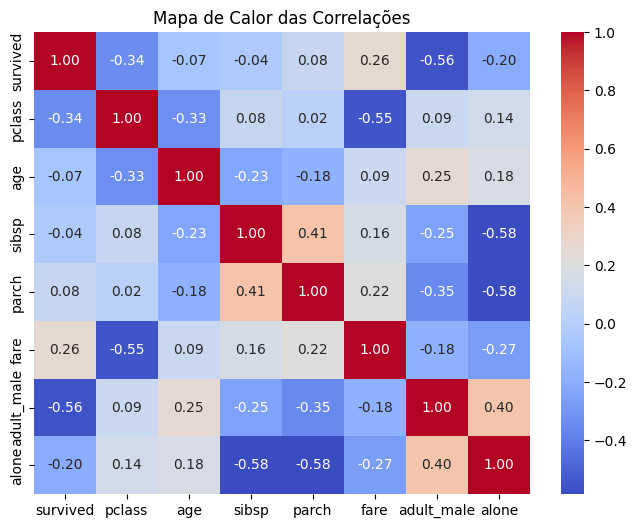


Atributo com maior correlação com 'survived':
fare com correlação de 0.2573065223849626

Atributo com menor correlação com 'survived':
pclass com correlação de -0.33848103596101514
Historicamente faz todo sentido essa correlação de acordo com o favorecimento dos mais afortunados para sobreviver ao naufrágio do Titanic.


In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor das Correlações')
plt.show()

numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()['survived'].drop('survived')
print("\nAtributo com maior correlação com 'survived':")
print(correlation.idxmax(), "com correlação de", correlation.max())

print("\nAtributo com menor correlação com 'survived':")
print(correlation.idxmin(), "com correlação de", correlation.min())

print("\nHistoricamente faz todo sentido essa correlação de acordo com o favorecimento dos mais afortunados para sobreviver ao naufrágio do Titanic, ou seja, quanto mais caro o bilhete, maior a chance de sobreviver.")

## **Critérios de Avaliação**
- **Correção das respostas:** 0,5 a 1,0 ponto por item, conforme complexidade.
- **Clareza do código:** Uso correto de bibliotecas e visualizações.
- **Justificativas:** Respostas textuais bem fundamentadas.

---